Temperature 1.5 K
MSD values: [-2.33689611e-12  2.01166268e+00  2.27055012e+00  2.44539869e+00
  2.60887856e+00]
Times: [0.    0.001 0.002 0.003 0.004]
Temperature 1.0 K
MSD values: [-3.36323562e-12  1.40479635e+00  1.81846391e+00  2.04961921e+00
  2.17182059e+00]
Times: [0.    0.001 0.002 0.003 0.004]
Temperature 0.9 K
MSD values: [-3.71692800e-12  7.02907017e-01  1.21763752e+00  1.54053625e+00
  1.70599141e+00]
Times: [0.    0.001 0.002 0.003 0.004]
Temperature 0.8 K
MSD values: [-3.63955779e-12  1.72203679e-01  3.44678047e-01  5.17414541e-01
  6.90412146e-01]
Times: [0.    0.001 0.002 0.003 0.004]
Temperature 0.7 K
MSD values: [-3.49587026e-12  2.04099454e+00  2.26235357e+00  2.46472098e+00
  2.64214330e+00]
Times: [0.    0.001 0.002 0.003 0.004]
Temperature 0.65 K
MSD values: [-3.05375478e-12  1.81920728e+00  2.01192394e+00  2.11863044e+00
  2.20317758e+00]
Times: [0.    0.001 0.002 0.003 0.004]
Temperature 0.6 K
MSD values: [-2.73480004e-12  1.53786484e+00  1.81965197e+00  1.96966

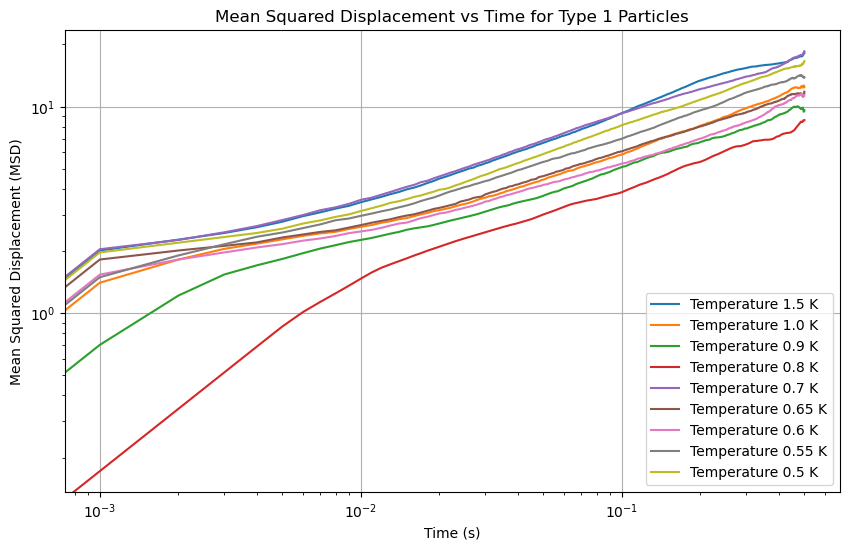

In [15]:
import numpy as np
import MDAnalysis as mda
from MDAnalysis.analysis import msd
import matplotlib.pyplot as plt
import glob

# Get list of trajectory files; each trajectory file should correspond to a temperature
trajectory_files = glob.glob("../Inputs/prod/*kalj*.xyz")
topology_file = glob.glob("../Inputs/equil/*kalj*.lammpstrj")[0]

# Ensure that we have the same number of files as temperatures
temperatures = [1.5, 1.0, 0.9, 0.8, 0.7, 0.65, 0.6, 0.55, 0.5, 0.475]  # Example temperatures

dt = 0.001  # Time step in seconds

# Create a figure for plotting
plt.figure(figsize=(10, 6))

# Loop through the temperatures and corresponding trajectory files
for temp, traj_file in zip(temperatures, trajectory_files):
    # Reload universe for each temperature with its unique trajectory
    universe = mda.Universe(topology_file, traj_file, topology_format='LAMMPSDUMP')
    
    # Select type 1 particles
    selection_str = 'type 1'
    selection = universe.select_atoms(selection_str)

    # Check if selection is non-empty
    if len(selection) == 0:
        print(f"No particles of type 1 found for temperature {temp} K.")
        continue  # Skip this temperature if no particles are found

    # Perform MSD calculation with the specified dt
    msd_analysis = msd.EinsteinMSD(selection, dt=dt)
    msd_analysis.run()

    # Access the timeseries data for MSD
    msd_values = msd_analysis.results.timeseries
    times = np.arange(len(msd_values)) * dt  # Generate times array

    # Debug: print MSD values and times for each temperature
    print(f"Temperature {temp} K")
    print("MSD values:", msd_values[:5])  # Print first few values for brevity
    print("Times:", times[:5])

    # Plot on a log-log scale
    plt.loglog(times, msd_values, label=f'Temperature {temp} K')

# Label the plot
plt.xlabel('Time (s)')
plt.ylabel('Mean Squared Displacement (MSD)')
plt.title('Mean Squared Displacement vs Time for Type 1 Particles')
plt.grid(True)
plt.legend()
plt.show()
